## 9주차과제_201810904_김다혜

In [1]:
import pyspark
myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [2]:
import os
myDf = spark\
    .read\
    .options(header='true', inferschema='true', delimiter=',')\
    .csv(os.path.join('data', '한강공원 주차장 월별 이용 현황.csv'))

# 9-1: 문제 설정

* (1) 한강공원 방문객 수는 계절에 영향을 받을까?
* (2) 방문객 수는 증가하는 추세일까?

# 9-2: 문제의 답

In [11]:
myDf.show()

+-------+--------------+--------+--------+-------+
| 지구별|      주차장명|주차대수|이용시간|   날짜|
+-------+--------------+--------+--------+-------+
|PLT-006|광나루12주차장|     358|   37828|2021/11|
|PLT-010| 잠원1-6주차장|    2162|  231250|2021/11|
|PLT-006| 광나루3주차장|     788|   32559|2021/11|
|PLT-005|   뚝섬4주차장|     457|   43218|2021/11|
|PLT-007|   양화2주차장|      54|    6581|2021/11|
|PLT-008| 여의도2주차장|     829|  156882|2021/11|
|PLT-008| 여의도5주차장|     379|  128867|2021/11|
|PLT-005|   뚝섬3주차장|     245|   21896|2021/11|
|PLT-001|   강서1주차장|     201|   16279|2021/11|
|PLT-008| 여의도3주차장|    1126|  423077|2021/11|
|PLT-008| 여의도1주차장|    1822|  280544|2021/11|
|PLT-008| 여의도4주차장|     213|   71900|2021/11|
|PLT-005|   뚝섬1주차장|     164|   12319|2021/11|
|PLT-009|  반포23주차장|    1851|  120743|2021/11|
|PLT-007|   양화1주차장|     253|   32193|2021/11|
|PLT-003|   망원1주차장|     245|   22569|2021/11|
|PLT-007| 양화345주차장|     780|   63223|2021/11|
|PLT-004|  이촌34주차장|     802|   72490|2021/11|
|PLT-009|   반포1주차장|     576|   29714|2021/1

In [37]:
from pyspark.sql import functions as F
myDf2 = myDf.groupBy("날짜").agg({"주차대수":"sum"}).sort(F.asc("날짜"))

In [38]:
myDf2.show()

+-------+-------------+
|   날짜|sum(주차대수)|
+-------+-------------+
|2020/01|     10299380|
|2020/02|     28172690|
|2020/03|     59496080|
|2020/04|     58178960|
|2020/05|     70108850|
|2020/06|     65327640|
|2020/07|     63097720|
|2020/08|     28385420|
|2020/09|     53966010|
|2020/10|     49991830|
|2020/11|     40375020|
|2020/12|     42320530|
|2021/01|     38837400|
|2021/02|     43010870|
|2021/03|     50610630|
|2021/04|     60497780|
|2021/05|     58921030|
|2021/06|     62407870|
|2021/07|     51166150|
|2021/08|     43426277|
+-------+-------------+
only showing top 20 rows



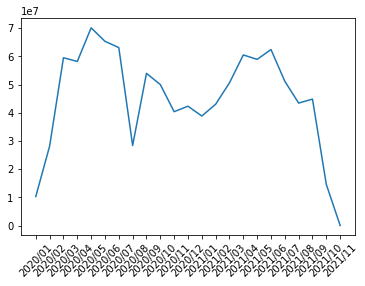

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

_dateRdd=myDf2.rdd.map(lambda fields:fields[0]).collect()
_sumRdd=myDf2.rdd.map(lambda fields:fields[1]).collect()

plt.plot(np.array(_dateRdd), np.array(_sumRdd))
plt.xticks(rotation=45)
plt.show()

(1) 한강공원 방문객 수는 계절에 영향을 받을까?
- 야외 특성상 여름과 겨울에는 방문객이 적고, 봄과 가을에 방문객이 많다.

(2) 방문객 수는 증가하는 추세일까?
- 사회적 거리두기의 영향으로 작년보다 다소 낮은 수치를 보인다.